#Exploratory Data Analysis of Financial Data

Work By - RAVJOT SINGH

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

##Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Knowing the data

Analyzing historical price data is an important way to try to make future predictions. We will be using a dataset of stock data for the company XYZ. This data includes opening, closing, high, and low prices per day. 

##Importing & Loading the dataset

In [ ]:
path = "/content/HistoricalQuotes.csv"

What does `parse_dates` do ?

Reading date columns from a CSV file

By default, date columns are represented as objects when loading data from a CSV file. To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.

What is `index_col` ?

This is to allow you to set which columns to be used as the index of the dataframe. The default value is None, and pandas will add a new column start from 0 to specify the index column.

In [ ]:
df = pd.read_csv(path, index_col='date', parse_dates=['date'])

##Exploratory Data Analysis

`df.shape` - Return a tuple representing the dimensionality of the DataFrame.

In [ ]:
df.shape

(2519, 5)

`df.head(n=5)` - Return the first n rows. This function returns the first n rows for the object based on position. (default n=5)

In [ ]:
df.head()

,close,volume,open,high,low
date,,,,,
2020-12-26 13:33:00,"1,155.14","1,145,529","1,172","1,176.88","1,152"
2019-08-02 00:00:00,1196.3200,1745450.0000,1203.0000,1209.5000,1190.0000
2019-08-01 00:00:00,1211.7800,1771271.0000,1217.6300,1236.2980,1207.0000
2019-07-31 00:00:00,1218.2000,1997999.0000,1224.8700,1234.9100,1208.1800
2019-07-30 00:00:00,1228.0000,1430775.0000,1227.0000,1236.9100,1225.3200


`df.isna().sum()` - Count missing values for each column of the dataframe.

In [ ]:
df.isna().sum()

close     0
volume    0
open      0
high      0
low       0
dtype: int64

`df.drop()` - Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.

In [ ]:
#Dropping 1st row of the dataset
df.drop(df.index[0], inplace=True)

In [ ]:
#Revaluating the shape of the dataset to check the updated dataset, after dropping 1st row
df.shape

(2518, 5)

In [ ]:
#Updated dataset
df.head()

,close,volume,open,high,low
date,,,,,
2019-08-02,1196.3200,1745450.0000,1203.0000,1209.5000,1190.0000
2019-08-01,1211.7800,1771271.0000,1217.6300,1236.2980,1207.0000
2019-07-31,1218.2000,1997999.0000,1224.8700,1234.9100,1208.1800
2019-07-30,1228.0000,1430775.0000,1227.0000,1236.9100,1225.3200
2019-07-29,1241.8400,2069127.0000,1242.5000,1248.9950,1230.2000


`df.info()` - Print a concise summary of a DataFrame. 

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2019-08-02 to 2009-08-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2518 non-null   object
 1   volume  2518 non-null   object
 2   open    2518 non-null   object
 3   high    2518 non-null   object
 4   low     2518 non-null   object
dtypes: object(5)
memory usage: 118.0+ KB


Changing the dtype of the columns

`close`, `open`, `high`, `low` columns to `float` dtype

`volume` column to `int` dtype

In [ ]:
df.close = df.close.astype(float)
df.open = df.open.astype(float)
df.low = df.low.astype(float)
df.high = df.high.astype(float)

In [ ]:
df.volume = pd.to_numeric(df['volume']).astype(int)

In [ ]:
#Applying to .info() method again to check the updated dtypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2019-08-02 to 2009-08-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2518 non-null   float64
 1   volume  2518 non-null   int64  
 2   open    2518 non-null   float64
 3   high    2518 non-null   float64
 4   low     2518 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


`df.describe()` - Generate descriptive statistics. It is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [ ]:
#Summary statistics for all numeric columns
df.describe()

,close,volume,open,high,low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,612.300264,2.278235e+06,612.388284,617.484990,606.824462
std,311.029653,1.256103e+06,310.956806,313.720854,308.055488
min,220.278500,5.211410e+05,221.410100,223.417600,219.046000
25%,309.344400,1.518603e+06,309.113350,312.043200,306.689875
50%,550.887500,1.976994e+06,551.100000,556.012500,546.590650
75%,830.720000,2.619222e+06,831.457500,837.762500,826.200125
max,1296.200000,1.480348e+07,1289.120000,1296.975000,1271.710000


In [ ]:
#Summary statistics only for columns whose type is "int"
df.describe(include='int')

,volume
count,2.518000e+03
mean,2.278235e+06
std,1.256103e+06
min,5.211410e+05
25%,1.518603e+06
50%,1.976994e+06
75%,2.619222e+06
max,1.480348e+07


In [ ]:
#Summary statistics for all numeric columns with percentiles .3, .5 and .9
df.describe(percentiles=[.3, .5, .9])

,close,volume,open,high,low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,612.300264,2.278235e+06,612.388284,617.484990,606.824462
std,311.029653,1.256103e+06,310.956806,313.720854,308.055488
min,220.278500,5.211410e+05,221.410100,223.417600,219.046000
30%,326.846980,1.612094e+06,326.648420,329.873510,323.824180
50%,550.887500,1.976994e+06,551.100000,556.012500,546.590650
90%,1102.198000,3.620231e+06,1102.507100,1113.410890,1091.522000
max,1296.200000,1.480348e+07,1289.120000,1296.975000,1271.710000


## Filtering Data

In [ ]:
df.high.mean()

617.4849895154871

Q. Create a mask for all of the rows whose `daily high` is greater than `$600`.

Create a DataFrame using this mask.

In [ ]:
high_mask = df.high > 600
df.loc[high_mask]

,close,volume,open,high,low
date,,,,,
2019-08-02,1196.3200,1745450,1203.0000,1209.5000,1190.0000
2019-08-01,1211.7800,1771271,1217.6300,1236.2980,1207.0000
2019-07-31,1218.2000,1997999,1224.8700,1234.9100,1208.1800
2019-07-30,1228.0000,1430775,1227.0000,1236.9100,1225.3200
2019-07-29,1241.8400,2069127,1242.5000,1248.9950,1230.2000
...,...,...,...,...,...
2014-02-18,611.6699,2108553,606.8861,612.6751,606.1739
2014-02-14,607.5883,2193285,603.9563,608.3915,602.5368
2014-02-13,606.1234,1835894,596.4498,606.1234,595.8992


Q. Create a mask for the volume of 1771271.

Create a DataFrame of row(s) with a volume of 1771271.

In [ ]:
volume_mask = df.volume == 1771271
df.loc[volume_mask]

,close,volume,open,high,low
date,,,,,
2019-08-01,1211.78,1771271,1217.63,1236.298,1207.0


Q. Make a mask for all rows where the volume does not equal 1997999.

Filter using this mask.

In [ ]:
volume_mask = df.volume !=  1997999
df.loc[volume_mask]

,close,volume,open,high,low
date,,,,,
2019-08-02,1196.3200,1745450,1203.0000,1209.5000,1190.0000
2019-08-01,1211.7800,1771271,1217.6300,1236.2980,1207.0000
2019-07-30,1228.0000,1430775,1227.0000,1236.9100,1225.3200
2019-07-29,1241.8400,2069127,1242.5000,1248.9950,1230.2000
2019-07-26,1245.2200,6060795,1228.0000,1268.3940,1228.0000
...,...,...,...,...,...
2009-08-07,230.9017,2540727,230.1794,232.0737,229.8359
2009-08-06,227.4971,2108417,229.4873,229.7803,226.5726
2009-08-05,227.8911,2340638,230.3461,230.8058,226.2443


##Filtering Data with dates

###Selecting data from date ranges

Pulling data that meets specific conditions is one of the most powerful and commonly used operations with DataFrames.

###Importing datetime module

In [ ]:
from datetime import datetime

Setting dates for the mask

In [ ]:
start_date = datetime(2019,8,2)
end_date =  datetime(2019,7,29)

Q. Create a mask of historical dates in the given date range.

A mask can be used to make a selection of rows from a DataFrame.

In [ ]:
mask = (end_date <= df.index) & (df.index <= start_date)
df2 = df[mask]
df2

,close,volume,open,high,low
date,,,,,
2019-08-02,1196.32,1745450,1203.00,1209.500,1190.00
2019-08-01,1211.78,1771271,1217.63,1236.298,1207.00
2019-07-31,1218.20,1997999,1224.87,1234.910,1208.18
2019-07-30,1228.00,1430775,1227.00,1236.910,1225.32
2019-07-29,1241.84,2069127,1242.50,1248.995,1230.20


##Data Visualizations

###Line Plot showing Daily High Prices

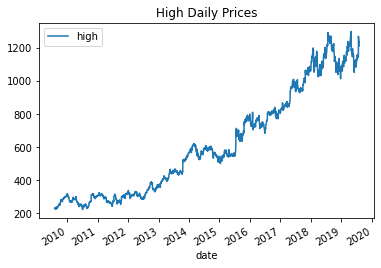

In [103]:
#Creating a line plot of Daily High Prices over time
df.plot(y='high')
plt.title("Daily High Prices")
plt.show()

###Histogram of High Prices

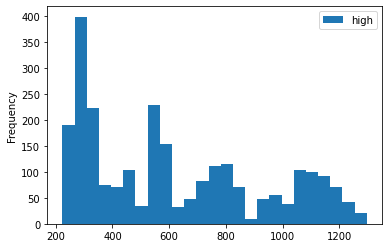

In [102]:
df.plot(y='high', kind='hist', bins=25)
plt.show()

###Line plot of Volume over time

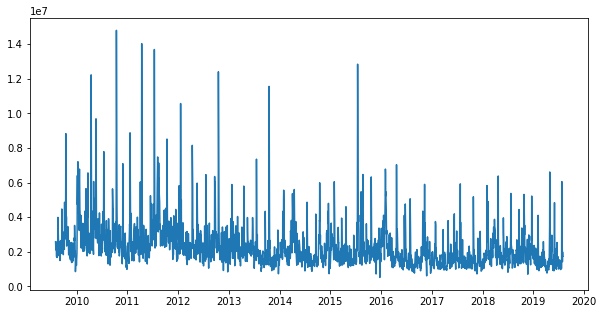

In [119]:
#Creating a line plot of daily trading volume using the dates as the x-axis
fig, ax = plt.subplots(figsize=[10,5])
plt.plot(df.volume)
plt.show()

###Daily Volume Frequency distribution

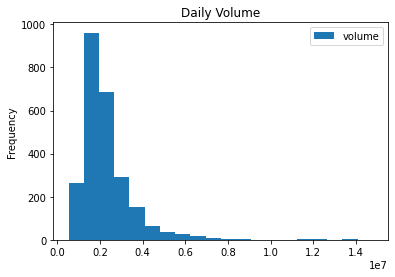

In [109]:
#Creating a Histogram of Daily trading volume
df.plot(y='volume', kind='hist', bins=20)
plt.title("Daily Volume")
plt.show()

###Filtering & Plotting data

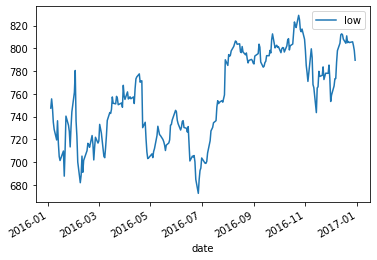

In [111]:
#Filtering data of year 2016 from the dataset and then plotting it on a line plot over time
df.loc['2016'].plot(y='low')
plt.show()